## IMPORTIN LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn  import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Data Analyses

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Null Values

In [4]:
data.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


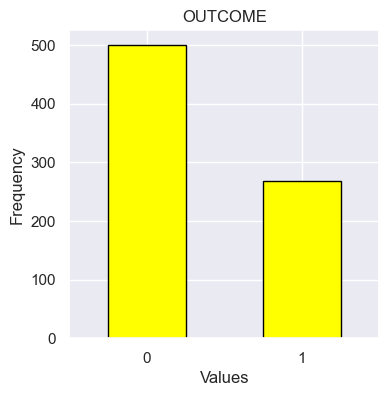

In [5]:
# Outcome Data
value_counts = data['Outcome'].value_counts()
plt.figure(figsize=(4, 4))
value_counts.plot(kind='bar', color='Yellow', edgecolor='black')
plt.title("OUTCOME")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

In [6]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Corelation Matrix

In [7]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

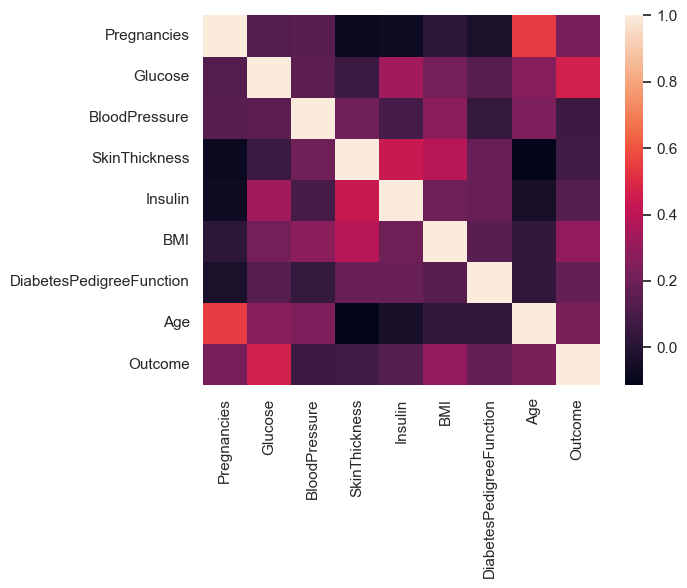

In [8]:
sns.heatmap(corr)

In [9]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

## Data Standerdization

In [10]:
scalr = StandardScaler()
scalr.fit(X)
Stand_data = scalr.transform(X)

In [11]:
Stand_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [12]:
X = Stand_data
Y = data['Outcome']

# Train Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)
X.shape

(768, 8)

In [14]:
x_train.shape

(614, 8)

In [15]:
x_test.shape

(154, 8)

## Training the model using Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
prediction = model.predict(x_test)

In [18]:
acc = accuracy_score(prediction,y_test)

In [19]:
acc

0.7662337662337663

76% is decent

## Training the model using Support Vector Model

In [20]:
model2 = svm.SVC(kernel='linear')

In [21]:
model2.fit(x_train, y_train)

SVC(kernel='linear')

In [22]:
prediction2 = model2.predict(x_test)

In [23]:
prediction2

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [24]:
acc2 = accuracy_score(prediction2,y_test)

In [25]:
acc2

0.7662337662337663

76% no big difference

## Training the model using Knn Model

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
pred3 = knn.predict(x_test)

In [28]:
pred3

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
acc3 = accuracy_score(y_test,pred3)
print("Accuracy: ", acc3)

# Detailed classification report
print(classification_report(y_test, pred3))

Accuracy:  0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.57      0.51      0.54        45

    accuracy                           0.75       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.74      0.75      0.74       154



Here The Accuracy is 74 which is lower than previous models we might not use this for our final deployments

## Training the model using Decision Trees

In [30]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth as needed

# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
# Predict on the test set
pred4 = dt_model.predict(x_test)


In [32]:
accuracy4 = accuracy_score(y_test,pred4)
print(f"Accuracy: {accuracy4:.2f}")

# Detailed classification report
print(classification_report(y_test, pred4))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.57      0.56      0.56        45

    accuracy                           0.75       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.75      0.75      0.75       154



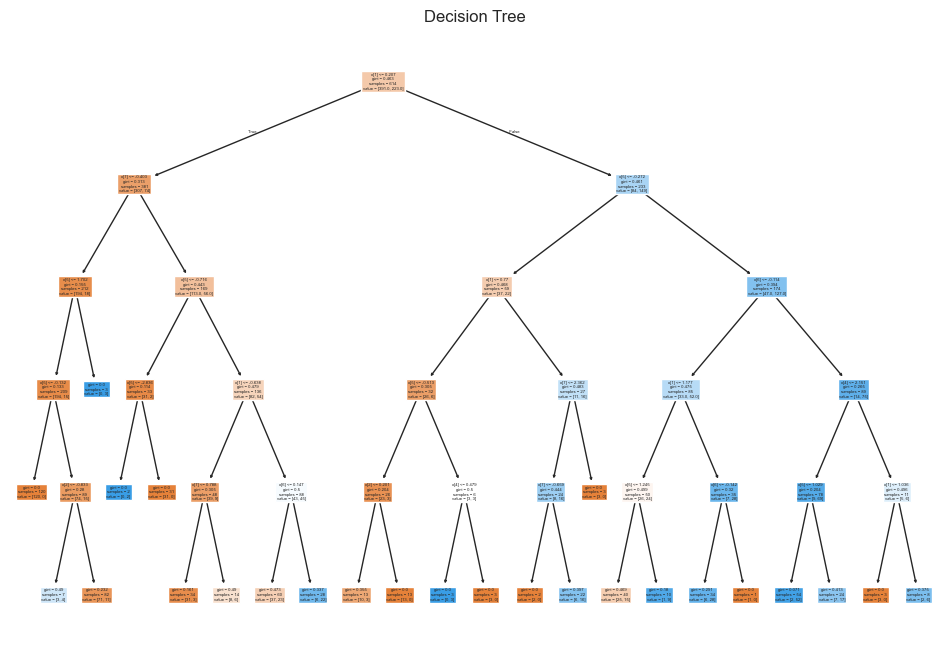

In [33]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True)
plt.title("Decision Tree")
plt.show()

75 % is better than Knn but still lower than SVM and Logestic Reg

## Finaly we are going To use SVM model for our predictions